In [20]:
# 패키지 영구 저장
import os, sys
# 구글 마운트 
from google.colab import drive
drive.mount('/content/drive')

# # 설치 경로 
# # os.mkdir('packages')           # 폴더 생성
# my_path = '/content/packages'

# # Colab Notebooks 안에 my_env 폴더에 패키지 저장
# os.symlink('/content/drive/MyDrive/Colab Notebooks/my_env', my_path)
# sys.path.insert(0, my_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = './data/'

from konlpy.tag import Okt, Kkma 
import pickle
import pandas as pd 
import re

okt = Okt() 
kkma = Kkma()

# 감성사전

### (1) KNU 감성사전(Okt)

In [3]:
knu_dict = pd.read_csv(file_path + 'add_knu_dict.csv')
knu_dict

,word,polarity,okt_word,pos_len
0,(-;,1.0,"[('(-;', 'Punctuation')]",1.0
1,(;_;),-1.0,"[('(;_;)', 'Punctuation')]",1.0
2,(^^),1.0,"[('(^^)', 'Punctuation')]",1.0
3,(^-^),1.0,"[('(^-^)', 'Punctuation')]",1.0
4,(^^*,1.0,"[('(^^*', 'Punctuation')]",1.0
...,...,...,...,...
15741,훨잼나,1.0,"[('훨잼', 'Noun'), ('나', 'Josa')]",2.0
15742,훨잼나네,1.0,"[('훨잼나', 'Noun'), ('네', 'Josa')]",2.0
15743,훨잼씀,1.0,"[('훨잼씀', 'Noun')]",1.0
15744,훨젬,1.0,"[('훨젬', 'Noun')]",1.0


In [5]:
data = pd.read_csv(file_path + 'clean_review_dataset.csv')
data

,영화,리뷰,평점,site
0,명량,여기에 말같잖은 평다는 놈들은 매국노 인증인 듯,10.0,naver
1,명량,다 좋았어요 한산보고 나서 보니 더 좋네요,10.0,naver
2,명량,2번째 본 역사영화 진짜 이순신은 대단한 영웅 중에 영웅보는 내내 끝까지 긴장 놓을...,10.0,naver
3,명량,정말 거짓말 안 한다클레멘타인에 대한 평가를 호평으로 오해했으면 관객 수가 이리 나...,1.0,naver
4,명량,재미있게 잘 봤습니다,10.0,naver
...,...,...,...,...
103569,완득이,세상에 수호천사는 없다,2.0,watcha
103570,완득이,도대체 유아인은 영화를 찍는지,1.0,watcha
103571,완득이,나도 멘토가 있었다면,6.0,watcha
103572,완득이,가장 이상적인 한국형 성장드라마,7.0,watcha


In [6]:
reviews = data['리뷰']
reviews

0                                여기에 말같잖은 평다는 놈들은 매국노 인증인 듯
1                                   다 좋았어요 한산보고 나서 보니 더 좋네요
2         2번째 본 역사영화 진짜 이순신은 대단한 영웅 중에 영웅보는 내내 끝까지 긴장 놓을...
3         정말 거짓말 안 한다클레멘타인에 대한 평가를 호평으로 오해했으면 관객 수가 이리 나...
4                                               재미있게 잘 봤습니다
                                ...                        
103569                                         세상에 수호천사는 없다
103570                                     도대체 유아인은 영화를 찍는지
103571                                          나도 멘토가 있었다면
103572                                    가장 이상적인 한국형 성장드라마
103573                              멋진 조화사회 문제를 영화에 담아내긴 했다
Name: 리뷰, Length: 103574, dtype: object

In [7]:
with open(file_path + 'okt_reviews.pkl', 'rb') as f:
    okt_reviews = pickle.load(f)

In [8]:
okt_reviews

[[('여기', 'Noun'),
  ('에', 'Josa'),
  ('말', 'Noun'),
  ('같잖다', 'Adjective'),
  ('평', 'Noun'),
  ('달다', 'Verb'),
  ('놈', 'Noun'),
  ('들', 'Suffix'),
  ('은', 'Josa'),
  ('매국노', 'Noun'),
  ('인증', 'Noun'),
  ('인', 'Josa'),
  ('듯', 'Noun')],
 [('다', 'Adverb'),
  ('좋다', 'Adjective'),
  ('한산', 'Noun'),
  ('보고', 'Noun'),
  ('나서다', 'Verb'),
  ('보다', 'Verb'),
  ('더', 'Noun'),
  ('좋다', 'Adjective')],
 [('2', 'Number'),
  ('번째', 'Suffix'),
  ('보다', 'Verb'),
  ('역사영화', 'Noun'),
  ('진짜', 'Noun'),
  ('이순신', 'Noun'),
  ('은', 'Josa'),
  ('대단하다', 'Adjective'),
  ('영웅', 'Noun'),
  ('중', 'Noun'),
  ('에', 'Josa'),
  ('영웅', 'Noun'),
  ('보다', 'Verb'),
  ('내내', 'Noun'),
  ('끝', 'Noun'),
  ('까지', 'Josa'),
  ('긴장', 'Noun'),
  ('놓다', 'Verb'),
  ('수', 'Noun'),
  ('없다', 'Adjective'),
  ('이순신', 'Noun'),
  ('이란', 'Josa'),
  ('인물', 'Noun'),
  ('이', 'Josa'),
  ('정말', 'Noun'),
  ('대단하다', 'Adjective'),
  ('영웅', 'Noun'),
  ('임', 'Noun')],
 [('정말', 'Noun'),
  ('거짓말', 'Noun'),
  ('안', 'Noun'),
  ('하다', 'Verb'),
  ('클레멘타인', 

In [9]:
data['okt_review'] = okt_reviews

In [10]:
knu_dict['okt_word'][11770]

"[('좋다', 'Adjective')]"

In [11]:
# knu_dict['okt_word'][11770] == f'{elements[1]}'

In [12]:
# SearchNgram_okt(1, okt_reviews[1], knu_dict)

In [13]:
def FilterSearch(new_n, new_lst, old_lst):
    if new_n == 1:
        idxs = sum([[i[0],i[0]+1] for i in old_lst],[])
    elif new_n == 2:
        idxs = sum([[i[0],i[0]+1,i[0]+2] for i in old_lst],[])
    else:
        idxs = []
    idxs = [str(i) for i in idxs]

    for new in new_lst:
        if str(new[0]) not in idxs:
            old_lst.append(new)

    return old_lst

def SearchNgram_okt(n, elements, knu_dict):
    gram_df = knu_dict[knu_dict['pos_len']==n]

    if n == 1:
        elements = [[e] for e in elements]
    else:
        elements = list(zip(*[review[i:] for i in range(n)]))
        elements = [list(e) for e in elements]
    # print(elements)
    
    search_lst = []
    search_cnt = 0
    for i, element in enumerate(elements):
        for j, word in enumerate(gram_df['okt_word']):
            # print(element, word, element == word)
            if f'{element}' == word:
                search_cnt += 1
                pol = gram_df.iloc[j, 1]
                search_lst.append([i, element, pol])
    
    # 메세지 출력
    # if search_cnt != 0:
    #     print(f'> {n} gram O({search_cnt})', end=' ')
    # else:
    #     print(f'> {n} gram X', end=' ')   

    return search_lst

# !!!!! 여기입니다

In [19]:
sub_data = data.iloc[90000:,:]
# file_name = 'final_data03.csv'      # 나래
# file_name = 'final_data36.csv'      # 서희
# file_name = 'final_data69.csv'      # 채린
file_name = 'final_data90.csv'      # 호준

In [20]:
details = []
polarity = []
print('Start!', end=' ')
for i, review in enumerate(okt_reviews[90000:]):
    # print(f'> {i+1}번째 review 탐색', end='')
    
    # ngram search
    all_search_lst = []
    old_lst = []
    for n in range(2,0,-1):
        search_lst = SearchNgram_okt(n, review, knu_dict)
        all_search_lst = FilterSearch(n, search_lst, old_lst)
        old_lst = all_search_lst
        
    pol_sum = sum([lst[-1] for lst in search_lst])
    details.append(all_search_lst)
    polarity.append(pol_sum)

    # print(f'> 탐색 종료!')
    # print(details[i])
    if (i+1) % 1000 == 0:
        print(f'> {(i+1)}', end=' ')
    if (i+1) % 10000 == 0:
        print()

sub_data['okt_details'] = details
sub_data['okt_polarity'] = polarity

sub_data

sub_data.to_csv(file_path + file_name)

Start! > 1000 > 2000 > 3000 > 4000 > 5000 > 6000 > 7000 > 8000 > 9000 > 10000 
> 11000 > 12000 > 13000 

C:\Users\WIN10\AppData\Local\Temp\ipykernel_15992\3993698983.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['okt_details'] = details
C:\Users\WIN10\AppData\Local\Temp\ipykernel_15992\3993698983.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['okt_polarity'] = polarity


In [ ]:
# ex_data = data.iloc[:5000,:]
# ex_data['okt_details'] = details
# ex_data['okt_polarity'] = polarity

# ex_data

<ipython-input-15-8b6df833985c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data['okt_details'] = details
<ipython-input-15-8b6df833985c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_data['okt_polarity'] = polarity


,영화,리뷰,평점,site,okt_review,okt_details,okt_polarity
0,명량,여기에 말같잖은 평다는 놈들은 매국노 인증인 듯,10.0,naver,"[(여기, Noun), (에, Josa), (말, Noun), (같잖다, Adjec...","[[3, [('같잖다', 'Adjective')], -1.0]]",-1.0
1,명량,다 좋았어요 한산보고 나서 보니 더 좋네요,10.0,naver,"[(다, Adverb), (좋다, Adjective), (한산, Noun), (보고...","[[1, [('좋다', 'Adjective')], 2.0], [7, [('좋다', ...",4.0
2,명량,2번째 본 역사영화 진짜 이순신은 대단한 영웅 중에 영웅보는 내내 끝까지 긴장 놓을...,10.0,naver,"[(2, Number), (번째, Suffix), (보다, Verb), (역사영화,...","[[7, [('대단하다', 'Adjective')], 2.0], [8, [('영웅'...",9.0
3,명량,정말 거짓말 안 한다클레멘타인에 대한 평가를 호평으로 오해했으면 관객 수가 이리 나...,1.0,naver,"[(정말, Noun), (거짓말, Noun), (안, Noun), (하다, Verb...","[[11, [('오해', 'Noun'), ('하다', 'Verb')], -1.0],...",-3.0
4,명량,재미있게 잘 봤습니다,10.0,naver,"[(재미있다, Adjective), (자다, Verb), (보다, Verb)]","[[0, [('재미있다', 'Adjective')], 2.0]]",2.0
...,...,...,...,...,...,...,...
4995,"광해, 왕이 된 남자",진짜 띵작이었네 너무 잘 만들었음,10.0,naver,"[(진짜, Noun), (띵작, Noun), (이다, Verb), (너무, Adve...",[],0.0
4996,"광해, 왕이 된 남자",볼 때마다 재밌고 감동적인 안 되는 영화 중,10.0,naver,"[(볼, Noun), (때, Noun), (마다, Josa), (재밌다, Adjec...","[[4, [('감동', 'Noun')], 2.0]]",2.0
4997,"광해, 왕이 된 남자",대한민군 최고 수준의 영화,10.0,naver,"[(대, Modifier), (한민, Noun), (군, Suffix), (최고, ...","[[3, [('최고', 'Noun')], 2.0]]",2.0
4998,"광해, 왕이 된 남자",언제 봐도 봐도 즐겁다,10.0,naver,"[(언제, Noun), (보다, Verb), (보다, Verb), (즐겁다, Adj...","[[3, [('즐겁다', 'Adjective')], 2.0]]",2.0


In [ ]:
# details[570]

[[0, [('생각', 'Noun'), ('없이', 'Adverb')], -1.0],
 [7, [('최고', 'Noun'), ('의', 'Josa')], 2.0],
 [3, [('웃다', 'Verb')], 2.0]]

In [ ]:
# ex_data.to_csv(file_path + 'final_data.csv')

### (2) KOSAC 감성사전(KKma)

#### 1) 감성사전 불러오기

In [ ]:
# import pandas as pd 

# kosac_dict = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/data/lexicon/polarity.csv')
# kosac_dict

,ngram,freq,COMP,NEG,NEUT,None,POS,max.value,max.prop
0,가*/JKS,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
1,가*/JKS;있/VV,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
2,가*/JKS;있/VV;었/EP,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
3,가*/VV,3,0.0,0.0,0.0,0.0,1.0,POS,1.0
4,가*/VV;ㄴ다*/EF,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
...,...,...,...,...,...,...,...,...,...
16357,힘들/VA;ㄹ/ETM;것/NNB,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16358,힘들/VA;ㄹ/ETM;때/NNG,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16359,힘차/VA,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16360,힘차/VA;ㄴ/ETM,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0


#### 2) 감성사전의 형태소 분석(Kkma) - 이미 분리 되어 있음

In [ ]:
# import re
# temp = kosac_dict['ngram'].apply(lambda x: re.sub('[*]','',x))
# temp = temp.apply(lambda x: x.split(';'))
# kkma_word = temp.apply(lambda x: [tuple(s.split('/')) for s in x])
# kosac_dict['kkma_word'] = kkma_word
# kosac_dict['pos_len'] = kkma_word.apply(len)

In [ ]:
# kkma_word

0                            [(가, JKS)]
1                   [(가, JKS), (있, VV)]
2          [(가, JKS), (있, VV), (었, EP)]
3                             [(가, VV)]
4                   [(가, VV), (ㄴ다, EF)]
                      ...              
16357    [(힘들, VA), (ㄹ, ETM), (것, NNB)]
16358    [(힘들, VA), (ㄹ, ETM), (때, NNG)]
16359                        [(힘차, VA)]
16360              [(힘차, VA), (ㄴ, ETM)]
16361    [(힘차, VA), (ㄴ, ETM), (붓, NNG)]
Name: ngram, Length: 16362, dtype: object

In [ ]:
# kosac_dict.to_csv(file_path + 'kosac_dict.csv', index=False)

In [ ]:
# kosac_dict['pos_len'].value_counts()

2    6579
3    6307
1    3476
Name: pos_len, dtype: int64

#### 3) clean_reviews에서 불용어인 품사 제외하기

In [ ]:
# reviews

0                             여기에 말같잖은 평다는 놈들은 매국노 인증인 듯
1                                다 좋았어요 한산보고 나서 보니 더 좋네요
2      2번째 본 역사영화 진짜 이순신은 대단한 영웅 중에 영웅보는 내내 끝까지 긴장 놓을...
3      정말 거짓말 안 한다클레멘타인에 대한 평가를 호평으로 오해했으면 관객 수가 이리 나...
4                                            재미있게 잘 봤습니다
                             ...                        
995                           그냥 재밌기만 하구만 댓글 방 구석평론가 납셨죠
996                                     재밌 다 정말 꿀잼이라고 한다
997                  알바왜이리 많냐 평점이 1점 10밖에 없나 이게 1점짜리 영화냐
998    스토리가 어이가 없네 주인공은 개어색하고 조연들이 더 나음 그래픽 만 화려하고 감동...
999                 오랜만에 다시 봤는데도 너무 재미있었고 엄청 울었어요도경 수파이팅
Name: 리뷰, Length: 1000, dtype: object

In [ ]:
# kkma_reviews = reviews.apply(lambda x: kkma.pos(str(x)))

In [ ]:
# kkma_reviews

0      [(여기, NP), (에, JKM), (말, NNG), (같잖, VA), (은, E...
1      [(다, MAG), (좋, VA), (았, EPT), (어요, EFN), (한, M...
2      [(2, NR), (번째, NNB), (보, VV), (ㄴ, ETD), (역사, N...
3      [(정말, MAG), (거짓말, NNG), (안, MAG), (하, VV), (ㄴ다...
4      [(재미있, VA), (게, ECD), (잘, MAG), (보, VV), (았, E...
                             ...                        
995    [(그냥, MAG), (재밌, VA), (기, ETN), (만, JX), (하구만,...
996    [(재, NNG), (밌, UN), (다, MAG), (정말, MAG), (꿀, N...
997    [(알바, NNG), (왜, MAG), (이리, MAG), (많, VA), (냐, ...
998    [(스토리, NNG), (가, JKS), (어이, NNG), (가, JKS), (없...
999    [(오랜만, NNG), (에, JKM), (다시, MAG), (보, VV), (았,...
Name: 리뷰, Length: 1000, dtype: object

In [ ]:
# data['kkma_review'] = kkma_reviews

In [ ]:
# kkma_pos_df = pd.DataFrame(set(sum(kkma_reviews, [])), columns=['word', 'pos'])
# kkma_pos_df = kkma_pos_df.sort_values(by='pos')
# kkma_pos_df

,word,pos
1737,길래,ECD
592,라도,ECD
2165,ㄴ데,ECD
947,ㄹ라,ECD
1416,어서,ECD
...,...,...
2123,허,XSV
2157,당하,XSV
1107,하,XSV
941,시키,XSV


In [ ]:
# kkma_pos_dict = {
#     'NNG' : '보통 명사', 'NNP' : '고유 명사',
#     'NNB' : '일반 의존 명사', 'NNM' : '단위 의존 명사',
#     'NR' : '수사', 'NP' : '대명사',

#     'VV' : '동사', 'VA' : '형용사',
#     'VXV' : '보조 동사', 'VXA' : '보조 형용사',
#     'VCP' : '긍정 지정사, 서술격 조사(이다)', 'VCN' : '부정 지정사, 형용사(아니다)',

#     'MDT' : '일반 관형사', 'MDN' : '수 관형사',
#     'MAG' : '일반 부사', 'MAC' : '접속 부사',    

#     'IC' : '감탄사',

#     'JKS' : '주격 조사', 'JKC' : '보격 조사',
#     'JKG' : '관형격 조사', 'JKO' : '목적격 조사',
#     'JKM' : '부사격 조사', 'JKI' : '호격 조사',
#     'JKQ' : '인용격 조사', 'JX' : '보조사',
#     'JC' : '접속 조사', 
    
#     'EPH' : '존칭 선어말 어미', 'EPT' : '시제 선어말 어미',
#     'EPP' : '공손 선어말 어미', 'EFN' : '평서형 종결 어미',
#     'EFQ' : '의문형 종결 어미', 'EFO' : '명령형 종결 어미',
#     'EFA' : '청유형 종결 어미', 'EFI' : '감탄현 종결 어미',
#     'EFR' : '존칭형 종결 어미', 'ECE' : '대등 연결 어미',
#     'ECD' : '의존적 연결 어미', 'ECS' : '보조적 연결 어미',
#     'ETN' : '명사형 전성 어미', 'ETD' : '관형형 전성 어미',

#     'XPN' : '체언 접두사', 'XPV' : '용언 접두사',
#     'XSN' : '명사 파생 접미사', 'XSV' : '동사 파생 접미사',
#     'XSA' : '형용사 파생 접미사', 'XR' : '어근',

#     'SF' : '마침표, 물음표, 느낌표', 'SP' : '쉼표, 가운뎃점, 콜론, 빗금',
#     'SS' : '따옴표, 괄호표, 줄표', 'SE' : '줄임표',
#     'SO' : '붙임표(물결, 숨김, 빠짐)', 'SW' : '기타기호',
    
#     'UN' : '명사 추정 범주', 'OL' : '외국어',
#     'OH' : '한자', 'ON' : '숫자',

#     'EMO' : '이모티콘, ㅋㅋ, ㅎㅎ', 'VX' : '보조 동사 , 보조 형용사'
#  }

In [ ]:
# kkma_pos_df['description'] = kkma_pos_df['pos'].apply(lambda x:kkma_pos_dict[x])

In [ ]:
# kkma_pos_df.to_csv(file_path + 'kkma_pos_df.csv', index=False)

In [ ]:
# kkma_pos_df['pos'].value_counts().sort_index()

ECD      45
ECE      29
ECS      14
EFA       2
EFI       3
EFN      37
EFO       2
EFQ      16
EMO       5
EPH       2
EPT       6
ETD      12
ETN       4
IC        7
JC       11
JKC       2
JKG       1
JKI       1
JKM      15
JKO       5
JKQ       2
JKS       5
JX       25
MAC       2
MAG     191
MDN       6
MDT      23
NNB      45
NNG    1472
NNM      28
NNP      32
NP       26
NR       60
UN      140
VA       97
VCN       1
VCP       1
VV      388
VX        3
VXA       5
VXV      16
XPN      14
XR       47
XSA       6
XSN      20
XSV       5
Name: pos, dtype: int64

In [ ]:
# exclusive_pos = ['ECD', 'ECS', 'EFI', 'EFN', 'EFQ', 'EMO', 'EPH',
#                  'EPT', 'ETD', 'ETN', 'JC', 'JKC', 'JKM', 'JKO', 'JKS',
#                  'NNM', 'NR', 'OL', 'SE', 'SF', 'SP', 'SO', 'SS', 'SW', 
#                  'XPN', 'XSA','XSN', 'XSV']

#### 4) 긍 / 부 찾기

In [ ]:
# reviews

0                             여기에 말같잖은 평다는 놈들은 매국노 인증인 듯
1                                다 좋았어요 한산보고 나서 보니 더 좋네요
2      2번째 본 역사영화 진짜 이순신은 대단한 영웅 중에 영웅보는 내내 끝까지 긴장 놓을...
3      정말 거짓말 안 한다클레멘타인에 대한 평가를 호평으로 오해했으면 관객 수가 이리 나...
4                                            재미있게 잘 봤습니다
                             ...                        
995                           그냥 재밌기만 하구만 댓글 방 구석평론가 납셨죠
996                                     재밌 다 정말 꿀잼이라고 한다
997                  알바왜이리 많냐 평점이 1점 10밖에 없나 이게 1점짜리 영화냐
998    스토리가 어이가 없네 주인공은 개어색하고 조연들이 더 나음 그래픽 만 화려하고 감동...
999                 오랜만에 다시 봤는데도 너무 재미있었고 엄청 울었어요도경 수파이팅
Name: 리뷰, Length: 1000, dtype: object

In [ ]:
# def FilterSearch(new_n, new_lst, old_lst):
#     if new_n == 1:
#         idxs = sum([[i[0],i[0]+1] for i in old_lst],[])
#     elif new_n == 2:
#         idxs = sum([[i[0],i[0]+1,i[0]+2] for i in old_lst],[])
#     else:
#         idxs = []
#     idxs = [str(i) for i in idxs]

#     for new in new_lst:
#         if str(new[0]) not in idxs:
#             old_lst.append(new)

#     return old_lst

# def RemoveSearch(elements):
#     new_lst = []
#     ind = 0
#     for element in elements:
#         if ind == element[0]:
#             continue
#         ind = element[0]
#         word, pos = element[1][0]
#         if len(word) == 1:
#             continue
#         if pos not in exclusive_pos and word not in stopwords:
#             new_lst.append(element)
#     return new_lst

# def SearchNgram_kkma(n, elements, kosac_dict):
#     gram_df = kosac_dict[kosac_dict['pos_len']==n]

#     if n == 1:
#         elements = [[e] for e in elements]
#     else:
#         elements = list(zip(*[review[i:] for i in range(n)]))
#         elements = [list(e) for e in elements]
#     # print(elements)
    
#     search_lst = []
#     search_cnt = 0
#     for i, element in enumerate(elements):
#         for j, word in enumerate(gram_df['kkma_word']):
#             if f'{element}' == word:
#                 search_cnt += 1
#                 pol = gram_df.iloc[j, 7]
#                 pol = 0 + (pol == 'POS')*1 + (pol == 'NEG')*(-1)
#                 search_lst.append([i, element, pol])
    
#     # 메세지 출력
#     if search_cnt != 0:
#         print(f'> {n} gram O({search_cnt})', end=' ')
#     else:
#         print(f'> {n} gram X', end=' ')   

#     return search_lst

In [ ]:
# details = []
# polarity = []
# for i, review in enumerate(kkma_reviews):
#     print(f'> {i+1}번째 review 탐색', end='')
    
#     # ngram search
#     all_search_lst = []
#     old_lst = []
#     for n in range(3,0,-1):
#         search_lst = SearchNgram_kkma(n, review, kosac_dict)
#         if n == 1:
#             search_lst = RemoveSearch(search_lst)
#         all_search_lst = FilterSearch(n, search_lst, old_lst)
#         if all_search_lst == []:
#             old_lst = []
#         else:
#             old_lst = all_search_lst

#     pol_sum = sum([lst[-1] for lst in all_search_lst])
#     details.append(all_search_lst)
#     polarity.append(pol_sum)

#     print(f'> 탐색 종료!')

# data['kkma_details'] = details
# data['kkma_polarity'] = polarity

# data

> 1번째 review 탐색> 3 gram X > 2 gram O(1) > 1 gram O(6) > 탐색 종료!
> 2번째 review 탐색> 3 gram X > 2 gram O(1) > 1 gram O(6) > 탐색 종료!
> 3번째 review 탐색> 3 gram X > 2 gram O(5) > 1 gram O(27) > 탐색 종료!
> 4번째 review 탐색> 3 gram O(1) > 2 gram O(4) > 1 gram O(19) > 탐색 종료!
> 5번째 review 탐색> 3 gram X > 2 gram X > 1 gram O(4) > 탐색 종료!
> 6번째 review 탐색> 3 gram X > 2 gram X > 1 gram O(1) > 탐색 종료!
> 7번째 review 탐색> 3 gram X > 2 gram X > 1 gram O(3) > 탐색 종료!
> 8번째 review 탐색> 3 gram O(1) > 2 gram O(2) > 1 gram O(17) > 탐색 종료!
> 9번째 review 탐색> 3 gram X > 2 gram O(1) > 1 gram O(6) > 탐색 종료!
> 10번째 review 탐색> 3 gram X > 2 gram O(1) > 1 gram O(7) > 탐색 종료!
> 11번째 review 탐색> 3 gram X > 2 gram X > 1 gram O(9) > 탐색 종료!
> 12번째 review 탐색> 3 gram X > 2 gram X > 1 gram O(2) > 탐색 종료!
> 13번째 review 탐색> 3 gram X > 2 gram X > 1 gram O(2) > 탐색 종료!
> 14번째 review 탐색> 3 gram X > 2 gram O(1) > 1 gram O(5) > 탐색 종료!
> 15번째 review 탐색> 3 gram X > 2 gram X > 1 gram O(3) > 탐색 종료!
> 16번째 review 탐색> 3 gram X > 2 gram X > 1 gram O(8) > 탐색 종료!


,영화,리뷰,평점,site,okt_review,okt_details,okt_polarity,kkma_review,kkma_details,kkma_polarity,final_score
0,명량,여기에 말같잖은 평다는 놈들은 매국노 인증인 듯,10.0,naver,"[(여기, Noun), (에, Josa), (말, Noun), (같잖다, Adjec...","[[3, [('같잖다', 'Adjective')], -1.0]]",-1.0,"[(여기, NP), (에, JKM), (말, NNG), (같잖, VA), (은, E...","[[9, [('들', 'XSN'), ('은', 'JX')], 0]]",0,-1.0
1,명량,다 좋았어요 한산보고 나서 보니 더 좋네요,10.0,naver,"[(다, Adverb), (좋다, Adjective), (한산, Noun), (보고...","[[1, [('좋다', 'Adjective')], 2.0], [7, [('좋다', ...",4.0,"[(다, MAG), (좋, VA), (았, EPT), (어요, EFN), (한, M...","[[11, [('더', 'MAG'), ('좋', 'VA')], 1]]",1,4.0
2,명량,2번째 본 역사영화 진짜 이순신은 대단한 영웅 중에 영웅보는 내내 끝까지 긴장 놓을...,10.0,naver,"[(2, Number), (번째, Suffix), (보다, Verb), (역사영화,...","[[7, [('대단하다', 'Adjective')], 2.0], [8, [('영웅'...",9.0,"[(2, NR), (번째, NNB), (보, VV), (ㄴ, ETD), (역사, N...","[[9, [('대단', 'XR'), ('하', 'XSA')], 1], [19, [(...",-1,11.0
3,명량,정말 거짓말 안 한다클레멘타인에 대한 평가를 호평으로 오해했으면 관객 수가 이리 나...,1.0,naver,"[(정말, Noun), (거짓말, Noun), (안, Noun), (하다, Verb...","[[11, [('오해', 'Noun'), ('하다', 'Verb')], -1.0],...",-3.0,"[(정말, MAG), (거짓말, NNG), (안, MAG), (하, VV), (ㄴ다...","[[29, [('수', 'NNB'), ('도', 'JX'), ('있', 'VV')]...",1,0.0
4,명량,재미있게 잘 봤습니다,10.0,naver,"[(재미있다, Adjective), (자다, Verb), (보다, Verb)]","[[0, [('재미있다', 'Adjective')], 2.0]]",2.0,"[(재미있, VA), (게, ECD), (잘, MAG), (보, VV), (았, E...",[],0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
995,신과함께-죄와 벌,그냥 재밌기만 하구만 댓글 방 구석평론가 납셨죠,10.0,naver,"[(그냥, Noun), (재밌다, Adjective), (하다, Verb), (댓글...",[],0.0,"[(그냥, MAG), (재밌, VA), (기, ETN), (만, JX), (하구만,...","[[2, [('기', 'ETN'), ('만', 'JX')], 0], [8, [('구...",2,2.0
996,신과함께-죄와 벌,재밌 다 정말 꿀잼이라고 한다,10.0,naver,"[(재밌다, Adjective), (다, Adverb), (정말, Noun), (꿀...","[[3, [('꿀잼', 'Noun')], 1.0]]",1.0,"[(재, NNG), (밌, UN), (다, MAG), (정말, MAG), (꿀, N...","[[3, [('정말', 'MAG')], 1]]",1,2.0
997,신과함께-죄와 벌,알바왜이리 많냐 평점이 1점 10밖에 없나 이게 1점짜리 영화냐,10.0,naver,"[(알바, Noun), (왜, Noun), (이리, Adverb), (많다, Adj...","[[3, [('많다', 'Adjective')], 2.0], [10, [('없다',...",1.0,"[(알바, NNG), (왜, MAG), (이리, MAG), (많, VA), (냐, ...","[[10, [('밖에', 'JX'), ('없', 'VA')], 0], [2, [('...",1,2.0
998,신과함께-죄와 벌,스토리가 어이가 없네 주인공은 개어색하고 조연들이 더 나음 그래픽 만 화려하고 감동...,1.0,naver,"[(스토리, Noun), (가, Josa), (어이, Noun), (가, Josa)...","[[4, [('없다', 'Adjective')], -1.0], [8, [('어색하다...",-1.0,"[(스토리, NNG), (가, JKS), (어이, NNG), (가, JKS), (없...","[[3, [('가', 'JKS'), ('없', 'VA')], -1], [13, [(...",1,0.0


In [ ]:
# # 불용어 가져오기 
# my_lst = ['영화', '연기', '배우', '스토리', '관객', '눈물', '사람', '마지막', '전쟁', '극장', '대사', '전투', '캐릭터', '이야기', '어머니', '가족', '내용', '슬픔', '오열'] 
# stopwords = pd.read_csv(file_path + 'stopwords-ko.txt').iloc[:,0].tolist()
# stopwords.extend(my_lst)

In [ ]:
# exclusive_pos

['ECD',
 'ECS',
 'EFI',
 'EFN',
 'EFQ',
 'EMO',
 'EPH',
 'EPT',
 'ETD',
 'ETN',
 'JC',
 'JKC',
 'JKM',
 'JKO',
 'JKS',
 'NNM',
 'NR',
 'OL',
 'SE',
 'SF',
 'SP',
 'SO',
 'SS',
 'SW',
 'XPN',
 'XSA',
 'XSN',
 'XSV']

In [ ]:
# details[97]

[[2, [('다시', 'MAG'), ('복습', 'NNG'), ('하', 'XSV')], 1],
 [38, [('거', 'NNB'), ('이', 'VCP')], -1],
 [57, [('눈물', 'NNG'), ('이', 'JKS')], -1],
 [7, [('영화', 'NNG')], 1],
 [9, [('점수', 'NNG')], 0],
 [16, [('보이', 'VV')], 1],
 [18, [('이기', 'VV')], -1],
 [22, [('기록', 'NNG')], 1],
 [29, [('이기', 'VV')], -1],
 [32, [('충분히', 'MAG')], 1],
 [33, [('영화', 'NNG')], 1],
 [41, [('예상', 'NNG')], -1],
 [42, [('가능', 'NNG')], -1],
 [52, [('현재', 'NNG')], -1],
 [56, [('더욱', 'MAG')], -1]]

In [ ]:
# data['final_score'] = data['okt_polarity'] + data['kkma_polarity']

In [ ]:
# data.to_csv(file_path + 'final_data13.csv', index=False)

In [ ]:
# !apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# temp = data['kkma_details'].apply(lambda x: sum([t[1] for t in x], []))
# temp = temp.apply(lambda x: [t[0] for t in x if len(t[0]) > 1])
# words = []
# for t in temp:
#     words.extend(t)
# words

['대단',
 '까지',
 '대단',
 '역사',
 '내내',
 '긴장',
 '정말',
 '생각',
 '거짓말',
 '대하',
 '이리',
 '나오',
 '너무',
 '사람',
 '대하',
 '대하',
 '매기',
 '돌아가',
 '이름',
 '화려',
 '아주',
 '미치',
 '나오',
 '기대',
 '충족',
 '수준',
 '너무',
 '떨어지',
 '재미있',
 '감사',
 '나라',
 '내내',
 '울컥',
 '지키',
 '최고',
 '대단',
 '정말',
 '가슴',
 '대작',
 '모르',
 '이용',
 '나라',
 '이나',
 '첨단',
 '기술',
 '자연',
 '틈바구니',
 '구하',
 '대하',
 '그러',
 '마음',
 '가지',
 '감동',
 '최고',
 '디테일',
 '가치',
 '가슴',
 '최고',
 '특히',
 '긴장감',
 '그대로',
 '밖에',
 '나오',
 '만들',
 '감독',
 '다시',
 '정말',
 '느낌',
 '가족',
 '매끄럽',
 '빠르',
 '놀라',
 '내내',
 '가슴',
 '많이',
 '마음',
 '역시',
 '디테일',
 '너무',
 '위대',
 '정말',
 '감동',
 '이용',
 '관객',
 '최악',
 '반성',
 '중국',
 '재미있',
 '내내',
 '목숨',
 '바치',
 '지키',
 '영화',
 '만들',
 '역시',
 '관계자',
 '감사',
 '정도',
 '만들',
 '모르',
 '그냥',
 '영화',
 '영화',
 '떠나',
 '방법',
 '중점',
 '감동',
 '아픔',
 '억지',
 '너무',
 '많이',
 '만들',
 '너무',
 '가슴',
 '벅차',
 '너무',
 '조절',
 '영화',
 '문제',
 '심각',
 '점수',
 '만들',
 '정말',
 '슬프',
 '가장',
 '만들',
 '눈물',
 '최고',
 '정말',
 '나오',
 '막히',
 '섞이',
 '최고',
 '감동',
 '아니',
 '연기',
 '너무',
 '너무',
 '최고',
 '다시',
 '과장',


dict_keys(['너무', '최고', '영화', '웃기', '만들', '정말', '감동', '나오', '생각', '재미있', '다시', '억지', '사람', '재미', '감사', '모르', '그냥', '수준', '감독', '없이', '많이', '배우', '까지', '흥행', '나라', '정도', '처음', '필요', '웃음', '기대', '가슴', '인생', '마다', '역사', '내내', '이렇', '못하', '대단', '이나', '그러', '느낌', '눈물', '보이', '별로', '밖에', '슬프', '아니', '계속', '이유', '대하', '떨어지', '아쉽', '이해', '지키', '부분', '쓰레기', '좋아하', '살리', '추천', '훌륭', '미치', '대작', '마음', '역시', '가장', '우리', '작품', '그렇', '존경', '진심', '위대', '느끼', '기억', '거품', '싸우', '세계', '울리', '전혀', '흘리', '이리', '이름', '이용', '연기', '부족', '그나마', '제대로', '스럽', '아들', '엄청나', '국민', '사랑', '이제', '흐르', '작전', '완전', '자꾸', '인간', '보다', '엄마', '디테일', '관객', '중국', '아직', '자랑', '이기', '예상', '가능', '오버', '현실', '이야기', '평가', '즐겁', '위하', '이후', '인상', '들어가', '열연', '특유', '진지', '이거', '착하', '아주', '자연', '가지', '가치', '그대로', '가족', '최악', '떠나', '노력', '지금', '발전', '목적', '기록', '시나리오', '나쁘', '호소', '성공', '존재', '분명', '뻔하', '음악', '갈수록', '정신', '뛰어나', '마냥', '불쌍', '지나', '가득', '측면', '한계', '돋보이', '작가', '들이', '버리', '그리', '예전', '최근', '빠지', '힘들', '맛있', '교훈', '

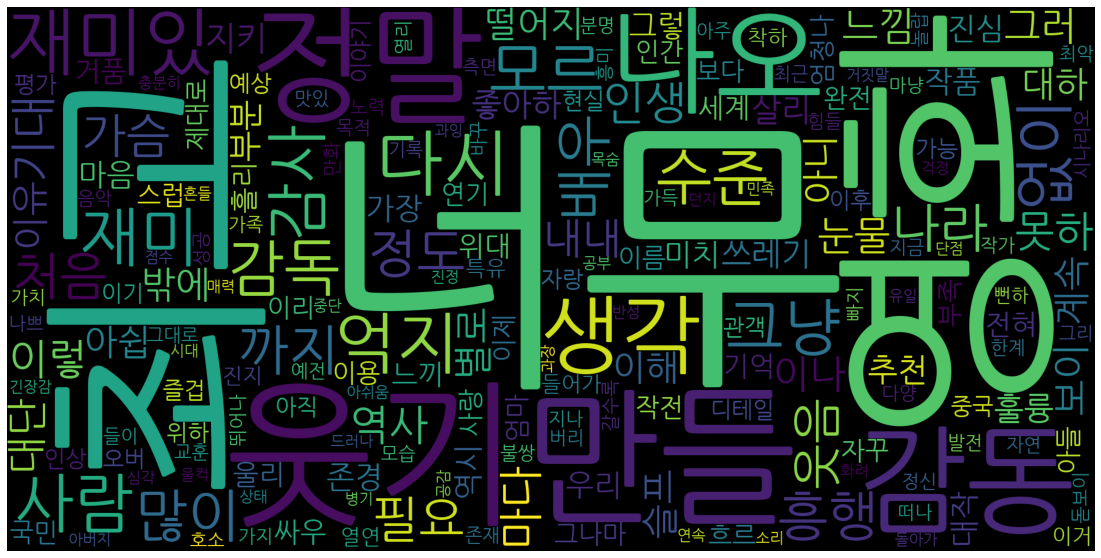

In [ ]:
# from collections import Counter

# count = Counter(words)
# words = dict(count.most_common())
# print(words.keys())

# from wordcloud import WordCloud
# import matplotlib.pyplot as plt 

# wordcloud = WordCloud(
#     font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
#     width=2000,
#     height=1000
# ).generate_from_frequencies(words)


# plt.figure(figsize=(20, 10))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()
